In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:

CSV_PATH = '/content/drive/MyDrive/SIS420-INTELIGENCIA ARTIFICIAL/DATASET/fashion-mnist_train.csv'

In [ ]:
# La entrada es de 784 elementos (28x28)
input_layer_size = 784

# 10 clases (0..9)
num_labels = 10


In [ ]:
import pandas as pd
import numpy as np

# Lee el CSV (por defecto sep=',' en Kaggle)
data = pd.read_csv(CSV_PATH)

# Inspección rápida
print("Shape:", data.shape)
print("Primeras columnas:", list(data.columns[:10])[:10])
print("Últimas columnas:", list(data.columns[-10:]))
data.head()


Shape: (60000, 785)
Primeras columnas: ['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9']
Últimas columnas: ['pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel784']


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Detecta automáticamente las columnas de píxeles (todas menos 'label')
feature_cols = [c for c in data.columns if c != 'label']
assert len(feature_cols) == 784, f"Se esperaban 784 features y hay {len(feature_cols)}"

# X (float) y y (int)
X = data[feature_cols].astype(np.float64).values
y = data['label'].astype(int).values

# Si los pixeles ya están 0..255, normaliza a [0,1]
if X.max() > 1.0:
    X = X / 255.0

print("X shape:", X.shape, " y shape:", y.shape, " | X.min/max:", X.min(), X.max())


X shape: (60000, 784)  y shape: (60000,)  | X.min/max: 0.0 1.0


In [ ]:
# =========================
# 1) SEPARAR TRAIN / TEST
# =========================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# data: DataFrame leído desde tu CSV de Drive
# CSV_PATH = '/content/drive/MyDrive/SIS420-INTELIGENCIA ARTIFICIAL/DATASET/fashion-mnist_train.csv'
# data = pd.read_csv(CSV_PATH)

# --- X e y (todas las columnas menos 'label' son features) ---
feature_cols = [c for c in data.columns if c != 'label']
X = data[feature_cols].astype(np.float64).values
y = data['label'].astype(int).values

# Si los píxeles están 0..255, normaliza a [0,1] (mantiene tu estilo simple aquí)
if X.max() > 1.0:
    X = X / 255.0

# --- Split 80/20 estratificado (muy importante para mantener balance por clase) ---
train_dataset, test_dataset, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Para mantener el mismo “naming” que usas:
X_train = train_dataset
X_test  = test_dataset

# Número de ejemplos
m_train = len(y_train)
m_test  = len(y_test)

# Mostrar una vista rápida (opcional)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test  shape:", X_test.shape)
print("y_test  shape:", y_test.shape)

print("\nEl 80% de ejemplos para entrenamiento son la cantidad de: {} de ejemplos".format(m_train))
print("El 20% de ejemplos para pruebas son la cantidad de: {} de ejemplos".format(m_test))

# --- Balance de clases (útil para tu informe) ---
def resumen_clases(y_arr, titulo):
    vc = pd.Series(y_arr).value_counts().sort_index()
    print("\n" + titulo)
    print(vc.to_string())

resumen_clases(y,        "Balance TOTAL por clase")
resumen_clases(y_train,  "Balance TRAIN por clase (estratificado)")
resumen_clases(y_test,   "Balance TEST por clase (estratificado)")


X_train shape: (48000, 784)
y_train shape: (48000,)
X_test  shape: (12000, 784)
y_test  shape: (12000,)

El 80% de ejemplos para entrenamiento son la cantidad de: 48000 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 12000 de ejemplos

Balance TOTAL por clase
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000

Balance TRAIN por clase (estratificado)
0    4800
1    4800
2    4800
3    4800
4    4800
5    4800
6    4800
7    4800
8    4800
9    4800

Balance TEST por clase (estratificado)
0    1200
1    1200
2    1200
3    1200
4    1200
5    1200
6    1200
7    1200
8    1200
9    1200


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# Normaliza usando solo estadísticos de TRAIN (evitar fuga)
X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm  = (X_test - mu) / sigma

print("Normalizados ->", X_train_norm.shape, X_test_norm.shape)

Normalizados -> (48000, 784) (12000, 784)


In [ ]:
X_train_norm

array([[-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682],
       [-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682],
       [-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682],
       ...,
       [-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682],
       [-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682],
       [-0.01025234, -0.02353047, -0.03863899, ..., -0.15817667,
        -0.09214684, -0.03325682]])

In [ ]:
# Obtener las dimensiones de la matriz de características X_train
m, n = X_train.shape

# X_train ya ha sido normalizado previamente, por lo que simplemente asignamos la versión normalizada a X_train
X_train = X_train_norm

# Las dimensiones de la matriz de características X_train se utilizan en el proceso de entrenamiento del modelo
# m representa el número de ejemplos de entrenamiento
# n representa el número de características
# Al asignar X_norm a X_train, nos aseguramos de que los datos de entrenamiento estén normalizados y listos para su uso en el modelo


In [ ]:
# Seleccionar aleatoriamente 100 puntos de datos para mostrar
# Se utiliza np.random.choice para seleccionar aleatoriamente 100 índices de entre 0 y m-1, sin reemplazo
# donde m es el número total de ejemplos de entrenamiento
rand_indices = np.random.choice(m, 100, replace=False)

# Seleccionar las filas correspondientes a los índices aleatorios de X_train
# Utilizamos iloc para acceder a las filas utilizando los índices seleccionados aleatoriamente
sel = X_train[rand_indices, :]

# La variable 'sel' ahora contiene 100 ejemplos de datos de entrenamiento seleccionados aleatoriamente

# Vectorización de regresión logística

In [ ]:
import numpy as np
def sigmoid(z):
    """Calcula la sigmoide de z."""
    z = np.array(z, dtype=np.float64)
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
def calcularCosto(theta, X, y):
    """ Costo logístico SIN regularización (para graficar). """
    m = y.size
    h = sigmoid(X.dot(theta.T))
    eps = 1e-12
    J = (1.0/m) * (-y.dot(np.log(h+eps)) - (1-y).dot(np.log(1-h+eps)))
    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_=0.0):
    """ Descenso por gradiente con L2 opcional (no se regulariza theta[0]). """
    m = y.shape[0]
    theta = theta.copy().astype(np.float64)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        grad = (1.0/m) * (X.T.dot(h - y))
        grad[1:] += (lambda_/m) * theta[1:]
        theta -= alpha * grad.T
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    """ Costo + gradiente regularizados (vectorizado). """
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    h = sigmoid(X.dot(theta.T))
    eps = 1e-12
    J = (1.0/m) * (-y.dot(np.log(h+eps)) - (1-y).dot(np.log(1-h+eps))) \
        + (lambda_/(2*m)) * np.sum(theta[1:]**2)
    grad = (1.0/m) * (X.T.dot(h - y))
    grad[1:] += (lambda_/m) * theta[1:]
    return J, grad

In [ ]:
# CELDA 6: OvR con GD (subconjunto) — para graficar costo por iteración
import matplotlib.pyplot as plt

def OneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    Xb = np.concatenate([np.ones((m,1)), X], axis=1)
    all_theta = np.zeros((num_labels, n+1))
    alpha = 0.5
    num_iters = 80

    fig, ax = plt.subplots()
    for c in range(num_labels):
        initial_theta = np.zeros(n+1)
        y_c = (y == c).astype(int)
        theta_c, J_hist = descensoGradiente(initial_theta, Xb, y_c, alpha, num_iters, lambda_)
        all_theta[c, :] = theta_c
        ax.plot(np.arange(len(J_hist)), J_hist, lw=2, label=f"Clase {c}")

    ax.set_xlabel("Número de iteraciones"); ax.set_ylabel("Costo J")
    ax.set_title("Convergencia del costo por clase (OvR con GD - Subconjunto)")
    ax.legend(ncols=2, fontsize=8); plt.show()
    return all_theta

In [ ]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    Xb = np.concatenate([np.ones((m,1)), X], axis=1)
    probs = sigmoid(Xb.dot(all_theta.T))
    p = np.argmax(probs, axis=1)
    return p, probs

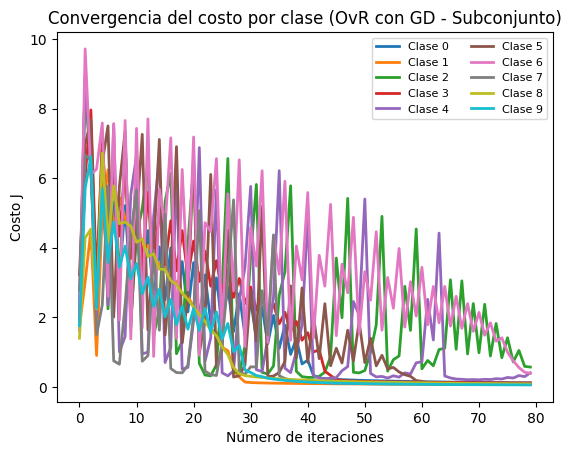

SUBTRAIN -> Accuracy: 0.80925  | LogLoss: 0.8852065566096382


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [ ]:

# Subconjunto estratificado para mostrar curvas
from sklearn.model_selection import train_test_split
N_SUBTRAIN = 20000
X_sub, _, y_sub, _ = train_test_split(
    X_train_norm, y_train, train_size=N_SUBTRAIN, random_state=42, stratify=y_train
)

lambda_gd = 1.0
all_theta_sub = OneVsAll(X_sub, y_sub, num_labels=num_labels, lambda_=lambda_gd)

# Métricas en el subconjunto
from sklearn.metrics import log_loss, accuracy_score
pred_sub, prob_sub = predictOneVsAll(all_theta_sub, X_sub)
print("SUBTRAIN -> Accuracy:", accuracy_score(y_sub, pred_sub), " | LogLoss:", log_loss(y_sub, prob_sub, labels=list(range(10))))

Clase 0 -> J_final~0.0958 | iters~50
Clase 1 -> J_final~0.0184 | iters~50
Clase 2 -> J_final~0.1377 | iters~50
Clase 3 -> J_final~0.0786 | iters~50
Clase 4 -> J_final~0.1239 | iters~50
Clase 5 -> J_final~0.0502 | iters~50
Clase 6 -> J_final~0.1740 | iters~50
Clase 7 -> J_final~0.0470 | iters~50
Clase 8 -> J_final~0.0444 | iters~50
Clase 9 -> J_final~0.0334 | iters~50
TEST -> Accuracy: 0.8517 | LogLoss: 0.4712

Reporte de clasificación (TEST):
              precision    recall  f1-score   support

           0     0.7865    0.8167    0.8013      1200
           1     0.9606    0.9758    0.9682      1200
           2     0.7750    0.7608    0.7679      1200
           3     0.8509    0.8800    0.8652      1200
           4     0.7481    0.8017    0.7739      1200
           5     0.9107    0.9175    0.9141      1200
           6     0.6727    0.5550    0.6082      1200
           7     0.9081    0.9225    0.9153      1200
           8     0.9397    0.9483    0.9440      1200
           9

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


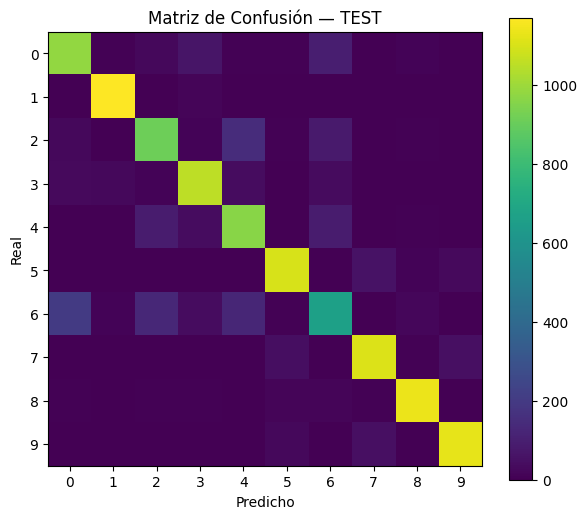

In [ ]:
# CELDA 7: OvR con optimize.minimize (CG) entrenando TODO el TRAIN
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def OneVsAllOM(X, y, num_labels, lambda_, maxiter=50):
    m, n = X.shape
    Xb = np.concatenate([np.ones((m,1)), X], axis=1)
    all_theta = np.zeros((num_labels, n+1))

    for c in range(num_labels):
        initial_theta = np.zeros(n+1)
        y_c = (y == c).astype(int)

        def cost_fun(t):
            J, _ = lrCostFunction(t, Xb, y_c, lambda_)
            return J

        def grad_fun(t):
            _, g = lrCostFunction(t, Xb, y_c, lambda_)
            return g

        res = optimize.minimize(cost_fun, initial_theta, jac=grad_fun,
                                method='CG', options={'maxiter': maxiter, 'gtol':1e-4})
        all_theta[c, :] = res.x
        print(f"Clase {c} -> J_final~{res.fun:.4f} | iters~{res.nit}")
    return all_theta

lambda_om = 1.0
all_theta = OneVsAllOM(X_train_norm, y_train, num_labels=num_labels, lambda_=lambda_om, maxiter=50)

# Evaluación en TEST
pred_te, prob_te = predictOneVsAll(all_theta, X_test_norm)
acc_te = accuracy_score(y_test, pred_te)
ce_te  = log_loss(y_test, prob_te, labels=list(range(10)))
print(f"TEST -> Accuracy: {acc_te:.4f} | LogLoss: {ce_te:.4f}")

print("\nReporte de clasificación (TEST):")
print(classification_report(y_test, pred_te, digits=4))

cm = confusion_matrix(y_test, pred_te, labels=list(range(10)))
plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de Confusión — TEST")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.colorbar()
plt.xticks(ticks=range(10), labels=range(10)); plt.yticks(ticks=range(10), labels=range(10))
plt.show()


In [ ]:
lambda_ = 0.1
all_theta = OneVsAllOM(X, y, num_labels, lambda_)
print(all_theta.shape)

Clase 0 -> J_final~0.0980 | iters~50
Clase 1 -> J_final~0.0182 | iters~50
Clase 2 -> J_final~0.1376 | iters~50
Clase 3 -> J_final~0.0826 | iters~50
Clase 4 -> J_final~0.1255 | iters~50
Clase 5 -> J_final~0.0387 | iters~50
Clase 6 -> J_final~0.1826 | iters~50
Clase 7 -> J_final~0.0430 | iters~50
Clase 8 -> J_final~0.0439 | iters~50
Clase 9 -> J_final~0.0295 | iters~50
(10, 785)


In [ ]:
print(all_theta)

[[-1.64270334e+00 -5.47861748e-04  9.13736418e-04 ... -8.94105329e-02
  -1.71973163e-02  1.13255652e-02]
 [-3.98905730e+00 -3.16362132e-05  1.73414726e-04 ... -1.28999330e-02
   2.19943744e-02 -2.95513757e-03]
 [-2.24680724e+00 -2.57633966e-04 -3.49013430e-04 ...  2.56214492e-01
   7.90281254e-02  1.68137152e-02]
 ...
 [-2.19283114e+00 -3.39056179e-06 -1.85721676e-05 ... -2.50118901e-02
  -5.68951987e-03 -2.48235096e-03]
 [-3.74784170e+00 -4.41833260e-04 -3.27632806e-04 ... -1.70431149e-01
  -1.05586399e-01 -2.30194458e-02]
 [-6.82744249e+00 -6.45429468e-06  2.74309632e-03 ... -6.84176496e-02
   1.39708266e-02  1.31222147e-02]]


In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [ ]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[100:145, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((45, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[100:145])

(60000, 784)
Precision del conjuto de entrenamiento: 85.93%
(45, 784)
(45, 785)
[8 5 0 5 3 0 8 5 4 1 0 7 6 1 9 7 6 9 3 3 2 6 0 6 3 0 3 5 9 7 7 3 3 6 7 2 4
 1 3 1 6 2 3 6 3]
[8 5 0 5 3 0 8 5 6 1 0 7 6 1 9 7 6 9 3 3 2 6 0 6 3 6 3 5 9 7 7 6 3 6 7 2 4
 1 3 1 0 6 3 0 3]
